<a href="https://colab.research.google.com/github/JamesEParry/Demo/blob/main/Create_Interaction_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Generate Interaction Data Inspired By: https://data.library.virginia.edu/understanding-2-way-interactions/ 

In [89]:
import pandas as pd
import numpy as np

# Create the 'gender' variable 20 male, 20 female.
gender = np.repeat(["male", "female"], 20)

# Create the 'trt' variable. resulting in an array of length 40 
# with elements repeated in pairs: ["no", "no", "yes", "yes",...]. 
trt = np.repeat(np.tile(["no", "yes"], 10), 2)

# Set the seed for reproducibility
np.random.seed(1)

# Create the 'resp' variable: The trick here is to vary the loc (mean) 
# for each group respectively to demo an interaction. In this case Male=Y
# will have a higher mean response than Male = N. For female, vice versa.
resp_male_y = np.random.normal(loc=20, size=10)
resp_male_n = np.random.normal(loc=10, size = 10)
resp_female_y = np.random.normal(loc=10, size=10)
resp_female_n = np.random.normal(loc=20, size=10)
resp = np.concatenate([resp_male_y, resp_male_n, resp_female_y, resp_female_n])

# Create the DataFrame 'dat'. Pull together the dataframe with three columns
# Concatenating each column into a df
dat = pd.DataFrame({
    "gender": gender,
    "trt": trt,
    "resp": resp
})

print(dat)


    gender  trt       resp
0     male   no  21.624345
1     male   no  19.388244
2     male  yes  19.471828
3     male  yes  18.927031
4     male   no  20.865408
5     male   no  17.698461
6     male  yes  21.744812
7     male  yes  19.238793
8     male   no  20.319039
9     male   no  19.750630
10    male  yes  11.462108
11    male  yes   7.939859
12    male   no   9.677583
13    male   no   9.615946
14    male  yes  11.133769
15    male  yes   8.900109
16    male   no   9.827572
17    male   no   9.122142
18    male  yes  10.042214
19    male  yes  10.582815
20  female   no   8.899381
21  female   no  11.144724
22  female  yes  10.901591
23  female  yes  10.502494
24  female   no  10.900856
25  female   no   9.316272
26  female  yes   9.877110
27  female  yes   9.064231
28  female   no   9.732112
29  female   no  10.530355
30  female  yes  19.308339
31  female  yes  19.603246
32  female   no  19.312827
33  female   no  19.154794
34  female  yes  19.328754
35  female  yes  19.987335
3

In [90]:
# Aggregate by 'gender' and calculate mean of 'resp'
result = dat.groupby('gender')['resp'].mean()

# Print the result
print(result)

gender
female    14.954169
male      14.866635
Name: resp, dtype: float64


In [91]:
# Aggregate by 'gender' and calculate mean of 'resp'
result = dat.groupby('trt')['resp'].mean()

# Print the result
print(result)

trt
no     14.799890
yes    15.020914
Name: resp, dtype: float64


In [92]:
# Create the cross-tabulation table
cross_tab = pd.pivot_table(dat, values='resp', index='gender', columns='trt', aggfunc=np.mean)

# Print the cross-tabulation table. Voila! An interaction :-). 
print(cross_tab)

trt            no        yes
gender                      
female  13.810843  16.097495
male    15.788937  13.944334


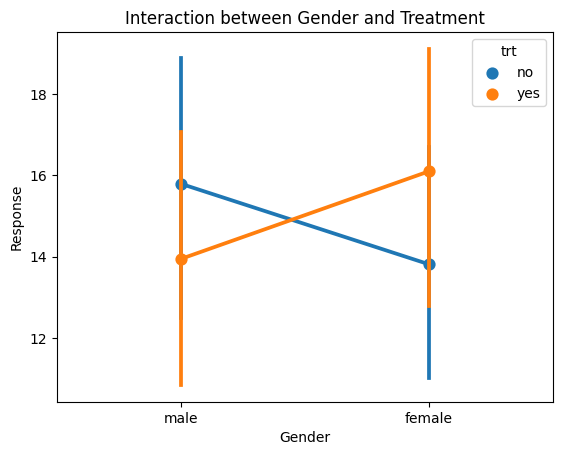

In [94]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the plot
sns.pointplot(x='gender', y='resp', hue='trt', data=dat)

# Add labels and title
plt.xlabel('Gender')
plt.ylabel('Response')
plt.title('Interaction between Gender and Treatment')

# Show the plot
plt.show()
